## Problem Statement
  There is an ever increase in focus of effective requirement. An organization invest a lot of time and resources in search of potential candidates. The investment become loses is the selected candidate do not join organization in the end.
  
  #### Challenges:
  * Recruiter need to understand the chances of candidate of joining the organization
  * There are numerous factors for which the candidate can backout of the job.
  * Confidential data cannot be obtained.
  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
data = pd.read_csv('HR_Data.csv')
data.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [6]:
import os
os.getcwd()

'C:\\Users\\pranay'

In [89]:
#checking for the shape of data
data.shape

(8998, 18)

In [10]:
# 'SLNO' column droppping
data.drop('SLNO',inplace=True,axis=1)

In [11]:
# column names renaming
data = data.rename(columns = {'Candidate.Ref':'Candidate_ref','DOJ.Extended':'DOJ_extended','Duration.to.accept.offer':'Accept_duration'
                             ,'Notice.period':'Notice_period','Offered.band':'Offered_band','Pecent.hike.expected.in.CTC':'Perecent_hike_expected',
                             'Percent.hike.offered.in.CTC':'Perecent_hike_offered','Percent.difference.CTC':'Percent_difference','Joining.Bonus':'Joining_Bonus',
                             'Candidate.relocate.actual':'Relocated','Candidate.Source':'Source','Rex.in.Yrs':'Rex'})

In [12]:
data.columns

Index(['Candidate_ref', 'DOJ_extended', 'Accept_duration', 'Notice_period',
       'Offered_band', 'Perecent_hike_expected', 'Perecent_hike_offered',
       'Percent_difference', 'Joining_Bonus', 'Relocated', 'Gender', 'Source',
       'Rex', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [93]:
#Checking datashape again
data.shape

(8998, 17)

In [6]:
#Checking  all null values present
data.isnull().sum()

Candidate_ref             0
DOJ_extended              0
Accept_duration           0
Notice_period             0
Offered_band              0
Perecent_hike_expected    0
Perecent_hike_offered     0
Percent_difference        0
Joining_Bonus             0
Relocated                 0
Gender                    0
Source                    0
Rex                       0
LOB                       0
Location                  0
Age                       0
Status                    0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Candidate_ref           8998 non-null   int64  
 1   DOJ_extended            8998 non-null   object 
 2   Accept_duration         8998 non-null   int64  
 3   Notice_period           8998 non-null   int64  
 4   Offered_band            8998 non-null   object 
 5   Perecent_hike_expected  8998 non-null   float64
 6   Perecent_hike_offered   8998 non-null   float64
 7   Percent_difference      8998 non-null   float64
 8   Joining_Bonus           8998 non-null   object 
 9   Relocated               8998 non-null   object 
 10  Gender                  8998 non-null   object 
 11  Source                  8998 non-null   object 
 12  Rex                     8998 non-null   int64  
 13  LOB                     8998 non-null   object 
 14  Location                8998 non-null   

## Target variable Analysis
 81 percent applicant join the organization and data is imbalanced which can affect the model

In [95]:
data['Status'].value_counts(normalize=True)

Joined        0.81307
Not Joined    0.18693
Name: Status, dtype: float64

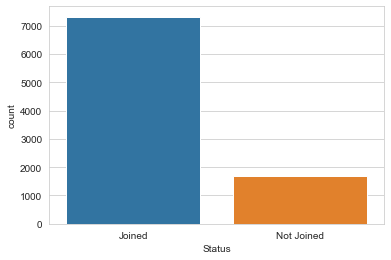

In [96]:
sns.set_style('whitegrid')
sns.countplot(data['Status'])
plt.show()

## Categorical variable analysis

### 1. Date of Joining Extended(DOJ EXTENDED)
   * It can we inferr that most of the applicant not applied for extension for date of joining.
   * Applicant apply for extension of joining date not joined organisation are more than who joined.

In [97]:
data['DOJ_extended'].value_counts(normalize=True)

No     0.532341
Yes    0.467659
Name: DOJ_extended, dtype: float64

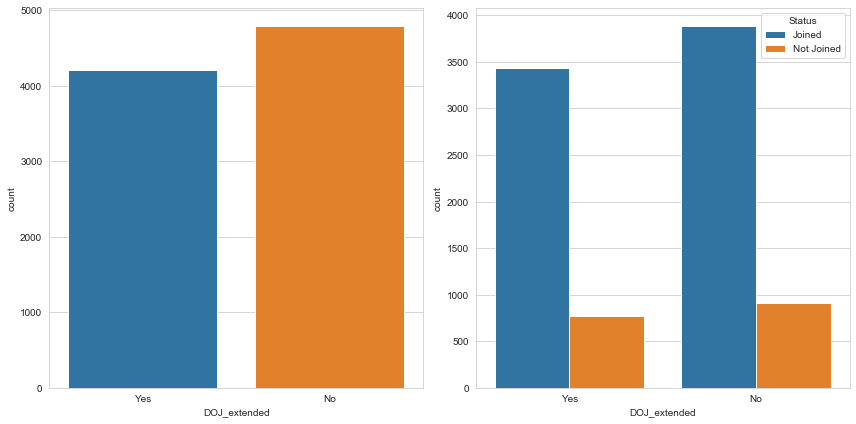

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'DOJ_extended',data = data)
plt.subplot(122)
sns.countplot(x = 'DOJ_extended',hue='Status',data = data)
plt.tight_layout()
plt.show()

## 2.  Offered Band
 * It can be inferr that 62% applicant are offered E1 offer Band.
 * Candidate offers offered band E1 joind the most.

In [99]:
data['Offered_band'].value_counts(normalize=True)

E1    0.619026
E2    0.301400
E3    0.056124
E0    0.023450
Name: Offered_band, dtype: float64

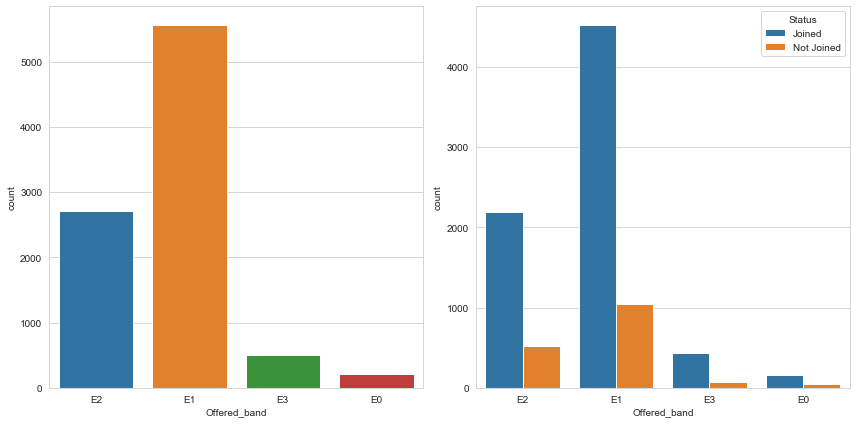

In [100]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'Offered_band',data = data)
plt.subplot(122)
sns.countplot(x = 'Offered_band',hue='Status',data = data)
plt.tight_layout()
plt.show()

## 3. Joining Bonus
 * Organization does not give any joining bonus to 95% applicants.
 * Male Candidates get joining bonus more as comapared to  female.

In [101]:
data['Joining_Bonus'].value_counts(normalize=True)

No     0.953656
Yes    0.046344
Name: Joining_Bonus, dtype: float64

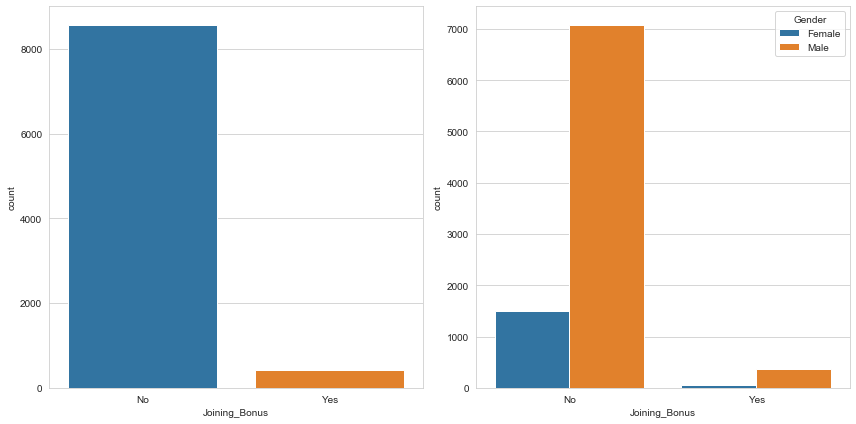

In [102]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'Joining_Bonus',data = data)
plt.subplot(122)
sns.countplot(x = 'Joining_Bonus',hue='Gender',data = data)
plt.tight_layout()
plt.show()

## 4. Gender
  * 82% candidates are male

In [103]:
data['Gender'].value_counts(normalize=True)

Male      0.827628
Female    0.172372
Name: Gender, dtype: float64

## 5. CANDIDATE RELOCATE ACTUAL
  * Most of the candidates has not relocated to any new city.
  * It can be concluded that male candidate  are not intersted in relocation and maximum female candidate who apply are interesed in relocation.

In [104]:
data['Relocated'].value_counts(normalize=True)

No     0.856635
Yes    0.143365
Name: Relocated, dtype: float64

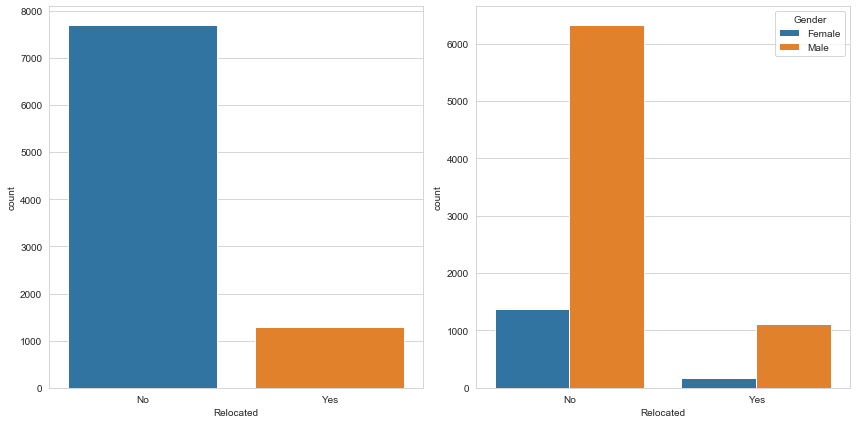

In [105]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'Relocated',data = data)
plt.subplot(122)
sns.countplot(x = 'Relocated',hue='Gender',data = data)
plt.tight_layout()
plt.show()


## 6. CANDIDATE SOURCE
  * There are three source from where canadidate come for employement by Any Agency, Employee Referral and Direct. 
  * It can we inferr that maximum no. of candidate come direct for interview.
  * Maximum candidate joined the organization irrespective of any source  .

In [13]:
# Checking unique value in candidate sourece
data['Source'].unique()

array(['Agency', 'Employee Referral', 'Direct'], dtype=object)

In [107]:
data['Source'].value_counts(normalize=True)


Direct               0.533785
Agency               0.287286
Employee Referral    0.178929
Name: Source, dtype: float64

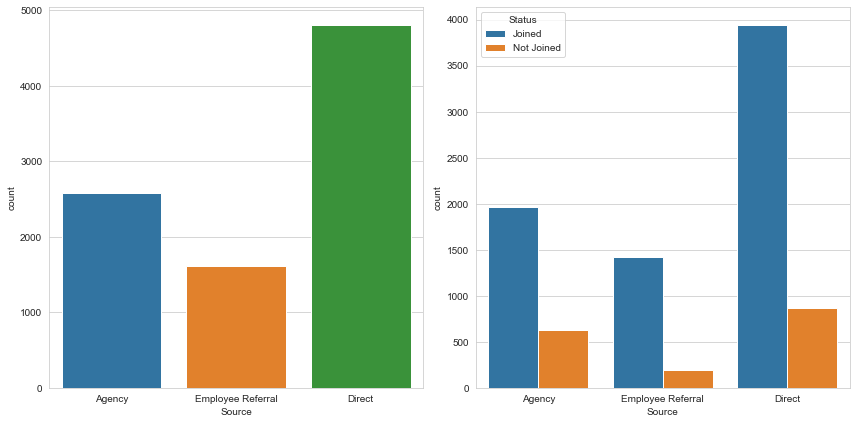

In [108]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'Source',data = data)
plt.subplot(122)
sns.countplot(x = 'Source',hue='Status',data = data)
plt.tight_layout()
plt.show()

## 7. LOCATION
 * Chennai is the place where most of the candidates got placed later by Noida & Bangalore

In [109]:
data['Location'].value_counts()

Chennai      3151
Noida        2728
Bangalore    2231
Hyderabad     341
Mumbai        197
Gurgaon       146
Kolkata       129
Pune           48
Others         13
Cochin          8
Ahmedabad       6
Name: Location, dtype: int64

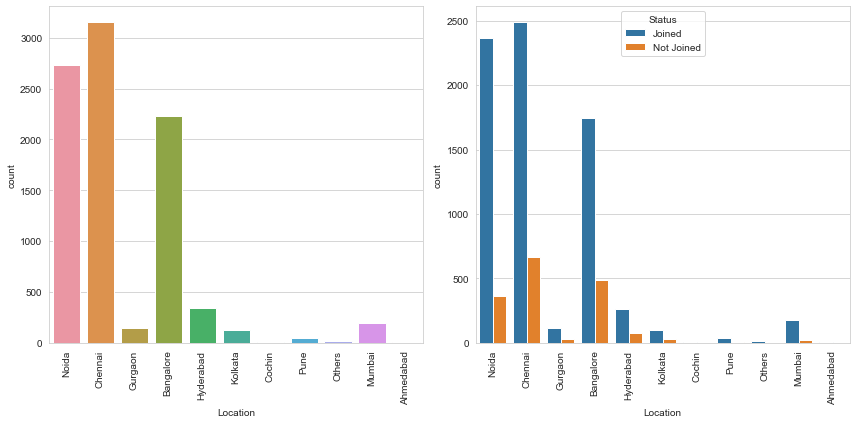

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'Location',data = data)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x = 'Location',hue='Status',data = data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 8.Line of Business(LOB)
* Line of business(LOB) for which offer was give is more for INFRA and followed by ERS,BFSI and others

In [111]:
data['LOB'].value_counts()

INFRA         2850
ERS           2427
BFSI          1396
ETS            693
CSMP           579
AXON           568
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64

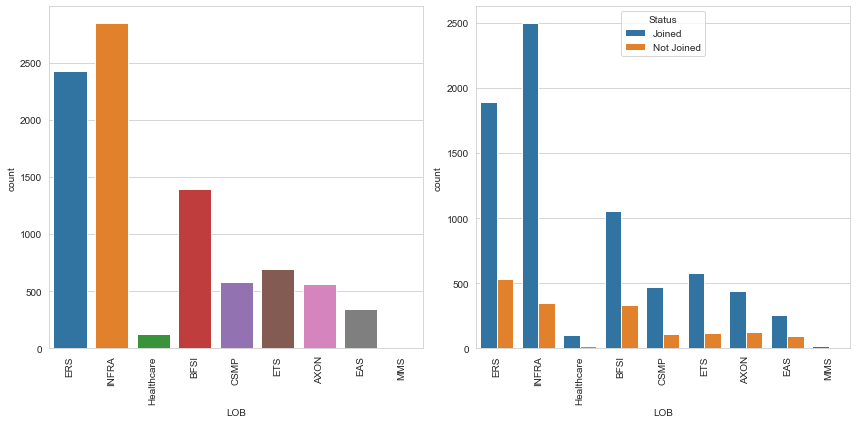

In [112]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x = 'LOB',data = data)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x = 'LOB',hue='Status',data = data)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
def outlier(Series):
    '''Calculating upper wishker and lower wishker'''
    IQR = Series.quantile(q=0.75) - Series.quantile(q=0.25)
    print(Series.name,' above',Series.quantile(q=0.75) + 1.5*IQR,' and Lower than',Series.quantile(q=0.25)-1.5*IQR,'are outliers')

In [28]:
# Droping Candidate_ref column
data.drop('Candidate_ref',axis=1,inplace=True)

In [29]:
data.columns

Index(['DOJ_extended', 'Accept_duration', 'Notice_period', 'Offered_band',
       'Perecent_hike_expected', 'Perecent_hike_offered', 'Percent_difference',
       'Joining_Bonus', 'Relocated', 'Gender', 'Source', 'Rex', 'LOB',
       'Location', 'Age', 'Status'],
      dtype='object')

In [30]:
data.describe()

,Accept_duration,Notice_period,Perecent_hike_expected,Perecent_hike_offered,Percent_difference,Rex,Age
count,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


## Correlation
 We can see some relationship between the
 * Percent_hike_offered & Percent_hike_excpected
 * Percent_difference & Percent_hike_offered
 * Age & Rex

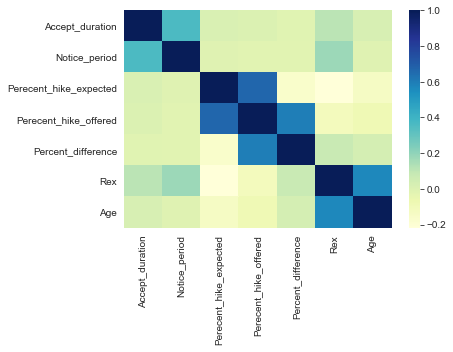

In [31]:
# correlation matrix
corr = data.corr()
sns.heatmap(corr,cmap="YlGnBu")
plt.show()

## Independent Variable (Numerical)

### 1. Accept_duration

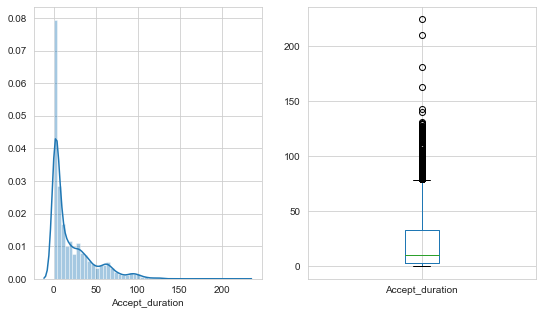

In [32]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Accept_duration'])
plt.subplot(122)
data['Accept_duration'].plot.box(figsize=(9,5))
plt.show()

In [ ]:
#removing of the otliers present in data

In [33]:
outlier(data['Accept_duration'])

Accept_duration  above 78.0  and Lower than -42.0 are outliers


## 2. Notice_period

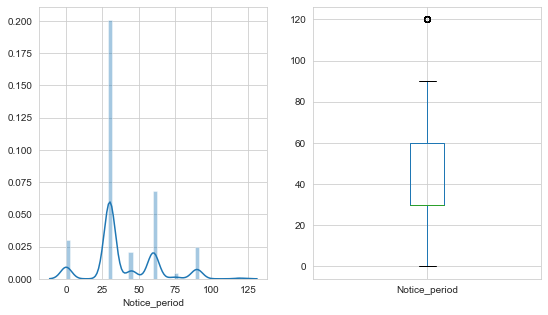

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Notice_period'])
plt.subplot(122)
data['Notice_period'].plot.box(figsize=(9,5))
plt.show()

## 3. Perecent_hike_expected

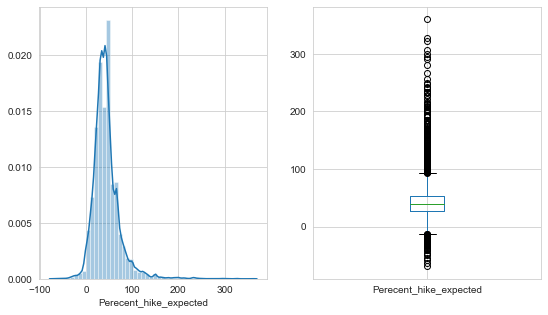

In [35]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Perecent_hike_expected'])
plt.subplot(122)
data['Perecent_hike_expected'].plot.box(figsize=(9,5))
plt.show()

## 4. Perecent_hike_offered

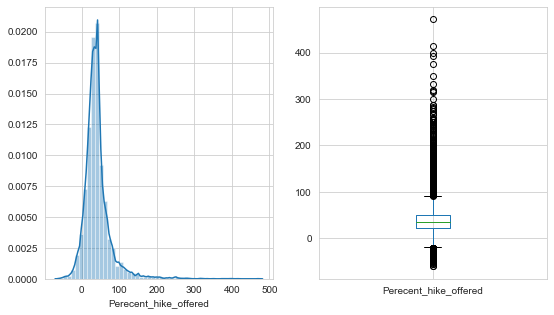

In [36]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Perecent_hike_offered'])
plt.subplot(122)
data['Perecent_hike_offered'].plot.box(figsize=(9,5))
plt.show()

## 5. Percent_difference

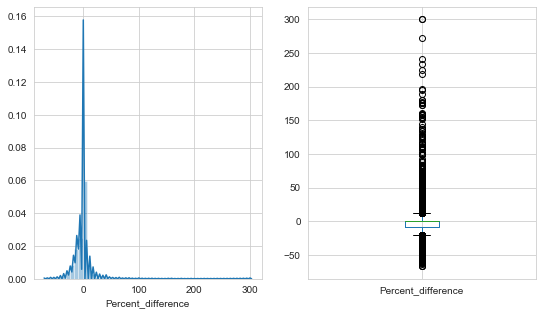

In [37]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Percent_difference'])
plt.subplot(122)
data['Percent_difference'].plot.box(figsize=(9,5))
plt.show()

## Creating independent and dependent variable

In [38]:
#Independented Varibales
X = data.drop('Status',axis=1)

# Dependent variables
y = data.Status

In [39]:
#Encoding dependented variable to binary > Joined to '0' Not Joined to '1'
y.replace(['Joined','Not Joined'],[0,1],inplace=True)

In [40]:
#Checking what are the  unique attributes
y.unique()

array([0, 1], dtype=int64)

## Creating Dummies

In [41]:
X = pd.get_dummies(X,drop_first=True)

In [42]:
X.head()

,Accept_duration,Notice_period,Perecent_hike_expected,Perecent_hike_offered,Percent_difference,Rex,Age,DOJ_extended_Yes,Offered_band_E1,Offered_band_E2,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14,30,-20.79,13.16,42.86,7,34,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,18,30,50.00,320.00,180.00,8,34,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,45,42.84,42.84,0.00,4,27,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,26,30,42.84,42.84,0.00,4,34,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,120,42.59,42.59,0.00,6,34,1,0,1,...,0,0,0,0,0,0,0,1,0,0


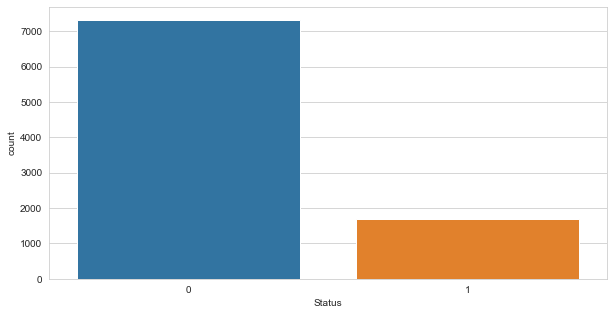

In [43]:
#Count plot for the Target variable
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data['Status'],ax=ax,)
plt.show()

## Balancing the dataset using the SMOTE

From all above observation we can observe the target variable which is "Status" is inbalance in nature which is we can observe from above plot number of candidates joined are more in number than the Not Joined once. Even though the model accuracy is good enough but the predications made are wrong we knew it. So inorder the make dataset balance in nature we shall use the Synthetic Minority Oversample TechniquE ( SMOTE ) for it to make it balance.

In [15]:
# Importing  the imblearn
! pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [115]:
#Importing the imblearn and SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [116]:
X_resm, y_resm = SMOTE(k_neighbors=5).fit_resample(X,y)

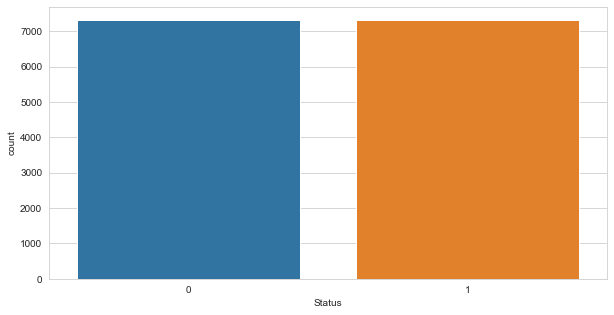

In [117]:
# doing Count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(pd.Series(y_resm),ax=ax)
plt.show()

From above observation we can see the target variable which is 'y' (Status) got balance

In [118]:
#Importing  of the train & test split
from sklearn.model_selection import train_test_split

#Spliting  of the to train,test
X_train,X_test,y_train,y_test = train_test_split(X_resm,y_resm,test_size=0.2,random_state=1001)

In [119]:
#Checking shape of train,test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11705, 34), (2927, 34), (11705,), (2927,))

## 1. Logistic Regression

In [120]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression


#model_1 as Logistic class
model_1 = LogisticRegression()

In [121]:
# model fitting 
model_1.fit(X_train,y_train)

LogisticRegression()

In [122]:
#predicating for X_test
y_pred = model_1.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [124]:
accuracy_score(y_test,y_pred)

0.8168773488213188

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1407
           1       0.85      0.79      0.82      1520

    accuracy                           0.82      2927
   macro avg       0.82      0.82      0.82      2927
weighted avg       0.82      0.82      0.82      2927



In [126]:
roc_auc_score(y_test,y_pred)

0.8181098735645084

## 2. Decision Tree

In [127]:
# Importing of the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [156]:
#Model_2 as DecisionTree
model_2 = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=17)

In [157]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=17)

In [158]:
model_2.tree_.max_depth

10

In [159]:
#Checking  of most important features present
imp_feature = model_2.tree_.compute_feature_importances()

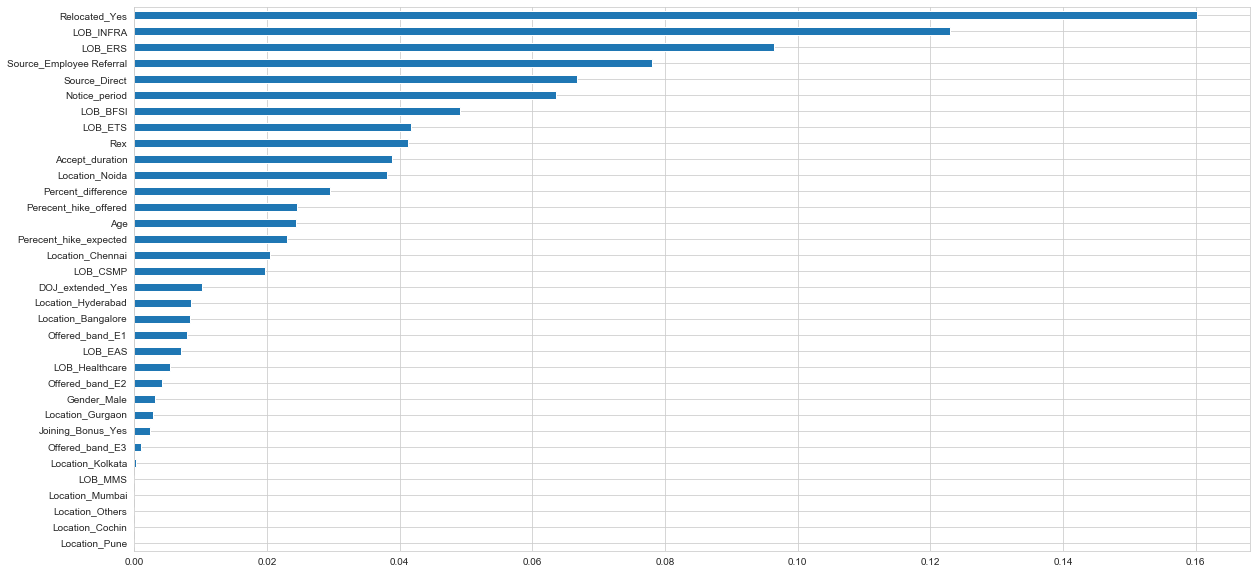

In [160]:
#Plotting of  important features
plt.figure(figsize=(20,10))
pd.Series(imp_feature,index=X.columns).sort_values().plot(kind='barh')
plt.show()

In [161]:
y_pred2 = model_2.predict(X_test)

In [162]:
accuracy_score(y_test,y_pred2)

0.8144858216604032

In [163]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1407
           1       0.84      0.80      0.82      1520

    accuracy                           0.81      2927
   macro avg       0.81      0.82      0.81      2927
weighted avg       0.82      0.81      0.81      2927



In [164]:
#Checking  what is score of train and test
model_2.score(X_train,y_train),model_2.score(X_test,y_test)

(0.8611704399829133, 0.8144858216604032)